# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df = pd.read_csv('../data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

#### INFO ABOUT THE COLUMNS
- FRESH: annual spending (m.u.) on fresh products (Continuous);
- MILK: annual spending (m.u.) on milk products (Continuous);
- GROCERY: annual spending (m.u.)on grocery products (Continuous);
- FROZEN: annual spending (m.u.)on frozen products (Continuous)
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
- DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
- CHANNEL: customers Channel: Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
- REGION: customers Region: Lisbon, Oporto or Other (Nominal)

In [3]:
# shape of the data set
df.shape

(440, 8)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# mean statistics
df.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [6]:
# there are not null or missing values
print(df.isnull().sum())
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


<AxesSubplot:>

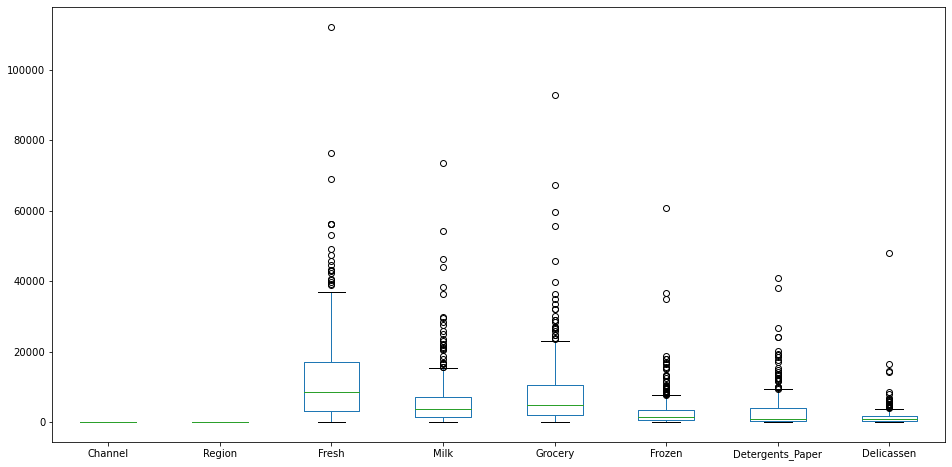

In [7]:
# outliers
df.plot(kind='box', figsize=(16,8))

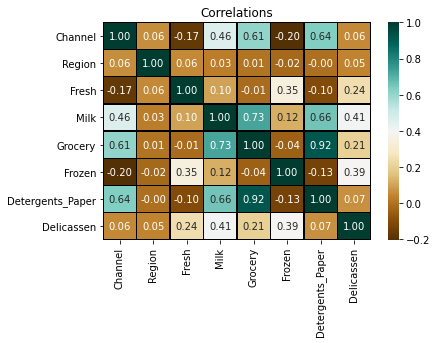

In [8]:
# correlation map
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True,annot_kws = {"size": 10},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

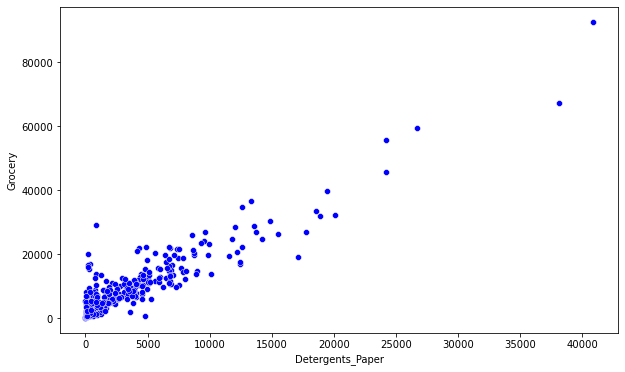

In [9]:
# lets check this correlation
df1 = df[['Detergents_Paper', 'Grocery']]


fig = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=df1, x='Detergents_Paper', y='Grocery', color='blue')

<AxesSubplot:xlabel='Channel'>

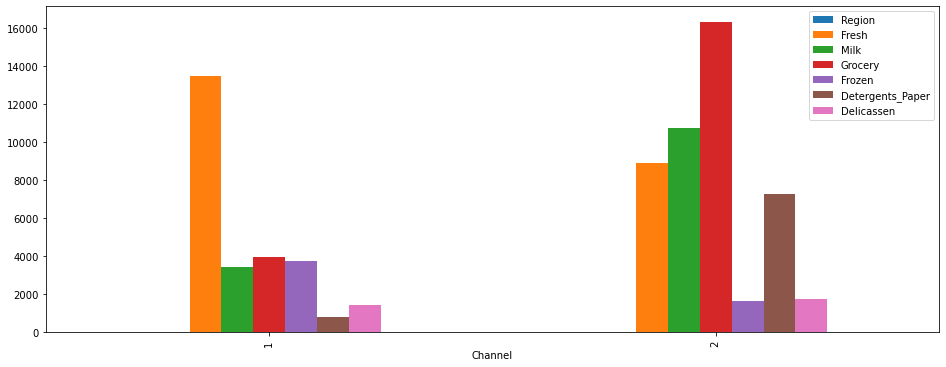

In [10]:
# mean spending by channel

mean_spending_by_channel = df.groupby(['Channel']).mean().round(2)
mean_spending_by_channel.plot(kind='bar', figsize=[16,6])

# in channel 1 the most sale product is FRESH and in channel 2 GROCERY.

<AxesSubplot:>

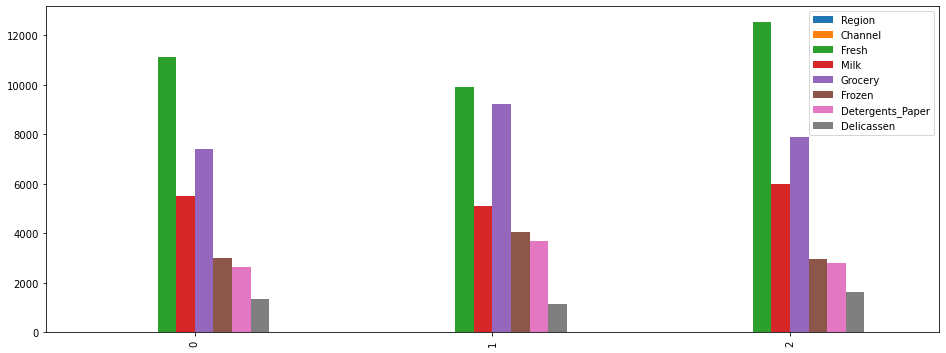

In [11]:
mean_spending_by_region = df.groupby(['Region'], as_index=False).mean().round(2)
mean_spending_by_region.plot(kind='bar', figsize=[16,6])

# between regions, the spending is smilar, but in region 2 people buy more fresh products.

In [73]:
# Pareto Principle: 20% of the customers account for 80% of the retail sales.

total_sales = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()
low_sales = df[['Frozen', 'Detergents_Paper', 'Delicassen']].sum().sum()


# agrupando por región

# df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [72]:
# creating a new column with total sales
df['Total sales'] = (df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen'])

# creating new column with the total purchases en each region
df.loc[df['Region'] == 3, 'Total people of Region'] = 316
df.loc[df['Region'] == 1, 'Total people of Region'] = 77
df.loc[df['Region'] == 2, 'Total people of Region'] = 47

# comparing the number of people on each region vs total sales quantity.
df_people_sales = df[['Total people of Region', 'Total sales']].groupby('Total people of Region', as_index=False).sum()
total_sales = df_people_sales['Total sales'].sum() 

# percentaje of the sales of each region
perc_sales_reg1 = ((df_people_sales['Total sales'][1]/total_sales)*100).round(2)
perc_sales_reg3 = ((df_people_sales['Total sales'][2]/total_sales)*100).round(2)
perc_sales_reg2 = ((df_people_sales['Total sales'][0]/total_sales)*100).round(2)

print(f'Total sales are {total_sales}. \n In region 1 made the {perc_sales_reg1}% of the sales, \n In region 2 made the {perc_sales_reg2}% of the sales and\n In region 3 made the {perc_sales_reg3}% of the sales.')

Total sales are 14619500. 
 In region 1 made the 16.33% of the sales, 
 In region 2 made the 10.64% of the sales and
 In region 3 made the 73.04% of the sales.


In [61]:
df_people_sales

,Total people of Region,Total sales
0,47,1555088
1,77,2386813
2,316,10677599


Conclusion:
- All columns are integers.
- There are not correlations between data except for Detergens_Paper and Grocery that have positive correlation. We can suppose that when someone buy groceries also buy detergent or paper products.
- The dataset don't display the Pareto's Principle.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [74]:
# transform channel and region into categorical data
df['Channel'].astype('category')
df['Region'].astype('category')

0      3
1      3
2      3
3      3
4      3
      ..
435    3
436    3
437    3
438    3
439    3
Name: Region, Length: 440, dtype: category
Categories (3, int64): [1, 2, 3]

In [75]:
cat_features = ['Channel', 'Region']
num_features = ['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicassen']

In [76]:
# Your comment here
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total sales,Total people of Region
0,2,3,12669,9656,7561,214,2674,1338,34112,316
1,2,3,7057,9810,9568,1762,3293,1776,33266,316
2,2,3,6353,8808,7684,2405,3516,7844,36610,316
3,1,3,13265,1196,4221,6404,507,1788,27381,316
4,2,3,22615,5410,7198,3915,1777,5185,46100,316
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,316
436,1,3,39228,1431,764,4510,93,2346,48372,316
437,2,3,14531,15488,30243,437,14841,1867,77407,316
438,1,3,10290,1981,2232,1038,168,2125,17834,316


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [58]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
customers_scale = scaler.fit_transform(df)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here:


Count the values in `labels`.

In [ ]:
# Your code here:


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here